In [63]:
# Import dependencies
import numpy as np
import pandas as pd
import re 

# Import depenencies for data visualization
import matplotlib.pyplot as plt  
import networkx as nx

In [64]:
# Loading Apriori Table
apriori_data_to_load = "Resources/apriori_viz_table_conf60.csv"

In [65]:
# Transporting Data Into DataFrame
apriori_viz_df = pd.read_csv(apriori_data_to_load)
apriori_viz_df.head()

,Category,Antecedents IDs,Antecedents Names,Consequent IDs,Consequent Names,confidence
0,Videos,"0788802194, 0788812408, 0788812807","Cinderella (Walt Disney's Masterpiece) [VHS], ...","6304401132, 0788805533, 0788806270",Sleeping Beauty (Fully Restored Limited Editio...,1.0
1,Videos,"0788812408, 155890641X, 0788802194, 6304401132...",The Little Mermaid (Fully Restored Special Edi...,6300274195,Dumbo [VHS],1.0
2,Videos,"155890641X, 6300274195, 0788802194, 6304401132...",Snow White and the Seven Dwarfs (Walt Disney's...,0788812408,The Little Mermaid (Fully Restored Special Edi...,1.0
3,Videos,"155890641X, 0788812408, 0788802194, 6300274195",Snow White and the Seven Dwarfs (Walt Disney's...,"6304401132, 0788812807",Sleeping Beauty (Fully Restored Limited Editio...,1.0
4,Videos,"155890641X, 0788812408, 6304401132, 6300274195",Snow White and the Seven Dwarfs (Walt Disney's...,"0788802194, 0788812807","Cinderella (Walt Disney's Masterpiece) [VHS], ...",1.0


In [66]:
apriori_viz = apriori_viz_df.iloc[0:6]
apriori_viz

,Category,Antecedents IDs,Antecedents Names,Consequent IDs,Consequent Names,confidence
0,Videos,"0788802194, 0788812408, 0788812807","Cinderella (Walt Disney's Masterpiece) [VHS], ...","6304401132, 0788805533, 0788806270",Sleeping Beauty (Fully Restored Limited Editio...,1.0
1,Videos,"0788812408, 155890641X, 0788802194, 6304401132...",The Little Mermaid (Fully Restored Special Edi...,6300274195,Dumbo [VHS],1.0
2,Videos,"155890641X, 6300274195, 0788802194, 6304401132...",Snow White and the Seven Dwarfs (Walt Disney's...,0788812408,The Little Mermaid (Fully Restored Special Edi...,1.0
3,Videos,"155890641X, 0788812408, 0788802194, 6300274195",Snow White and the Seven Dwarfs (Walt Disney's...,"6304401132, 0788812807",Sleeping Beauty (Fully Restored Limited Editio...,1.0
4,Videos,"155890641X, 0788812408, 6304401132, 6300274195",Snow White and the Seven Dwarfs (Walt Disney's...,"0788802194, 0788812807","Cinderella (Walt Disney's Masterpiece) [VHS], ...",1.0
5,Videos,"155890641X, 0788812408, 0788812807, 6300274195",Snow White and the Seven Dwarfs (Walt Disney's...,"0788802194, 6304401132","Cinderella (Walt Disney's Masterpiece) [VHS], ...",1.0


In [70]:
apriori_viz[['Antecedents Names']]

,Antecedents Names
0,"Cinderella (Walt Disney's Masterpiece) [VHS], ..."
1,The Little Mermaid (Fully Restored Special Edi...
2,Snow White and the Seven Dwarfs (Walt Disney's...
3,Snow White and the Seven Dwarfs (Walt Disney's...
4,Snow White and the Seven Dwarfs (Walt Disney's...
5,Snow White and the Seven Dwarfs (Walt Disney's...


In [72]:
video_apriori_list = [['Videos', '0788802194', 'Cinderella', '6304401132', 'Sleeping Beauty', 1.0 ],
                     ['Videos', '0788812408', 'The Little Mermaid', '0788805533', 'The Lion King II', 1.0],
                     ['Videos', '0788812807', 'The Lady and The Tramp', '0788806270', 'Bambi', 1.0 ]]

In [73]:
apriori_cleaned_df = pd.DataFrame(video_apriori_list, columns = ['Category', 'Antecedent ID', 'Antecedent Name', 'Consequent ID', 'Consequent Name', 'Confidence'])
apriori_cleaned_df

,Category,Antecedent ID,Antecedent Name,Consequent ID,Consequent Name,Confidence
0,Videos,0788802194,Cinderella,6304401132,Sleeping Beauty,1.0
1,Videos,0788812408,The Little Mermaid,0788805533,The Lion King II,1.0
2,Videos,0788812807,The Lady and The Tramp,0788806270,Bambi,1.0


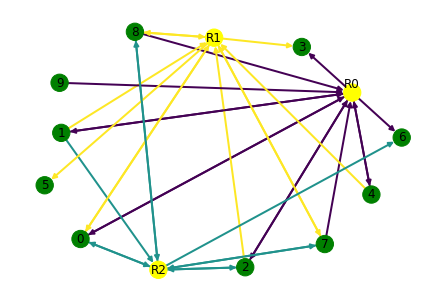

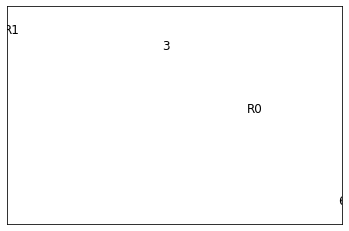

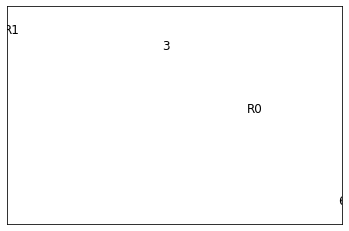

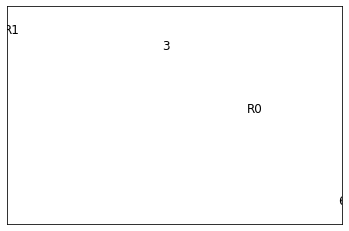

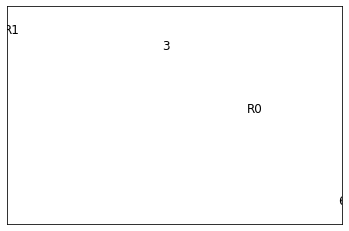

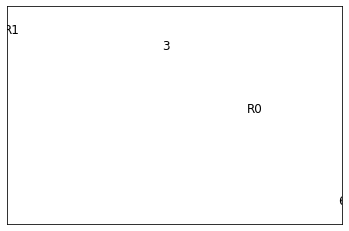

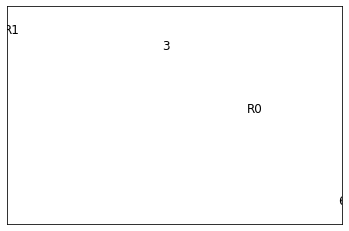

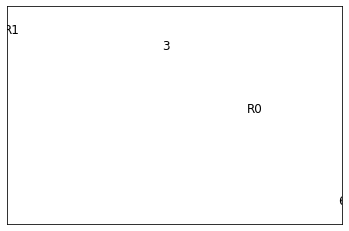

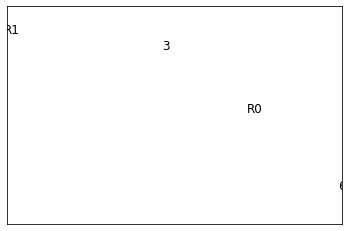

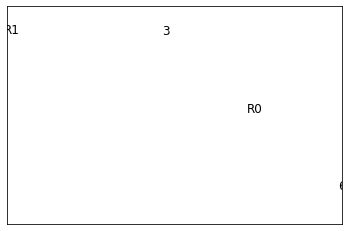

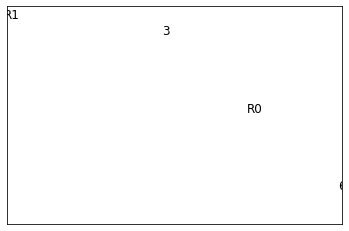

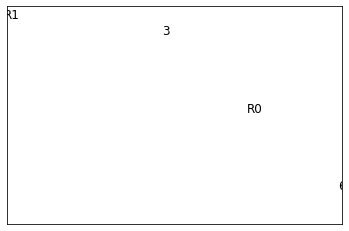

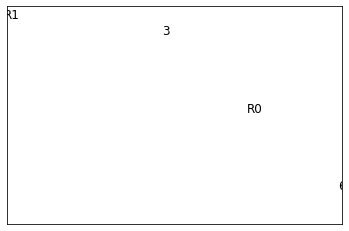

In [89]:
def apriori_graph(associations, associations_to_show):
    xgraph = nx.DiGraph()
    apriori_color=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5']

    for i in range(associations_to_show):
        xgraph.add_nodes_from(["R"+str(i)])
        for a in associations.iloc[i]['Antecedent ID']:
            xgraph.add_nodes_from([a])
            xgraph.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in associations.iloc[i]['Consequent ID']:
            xgraph.add_nodes_from([c])
            xgraph.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in xgraph:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            apriori_color.append('yellow')
        else:
            apriori_color.append('green')       

    edges = xgraph.edges()
    colors = [xgraph[u][v]['color'] for u,v in edges]
    weights = [xgraph[u][v]['weight'] for u,v in edges]

    text = nx.spring_layout(xgraph, k=16, scale=1)
    nx.draw(xgraph, text, edgelist=edges, node_color=apriori_color, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in text:  
        text[p][1] += 0.07
        nx.draw_networkx_labels(xgraph, text)
        plt.show()

apriori_graph(apriori_cleaned_df, 3)

